In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel(r"C:\Users\Hp\Documents\cricket_data2.xlsx")

In [3]:
df.head()

,Player_ID,Age,Playing_Position,Previous_Injury_History,Height_cm,Weight_kg,BMI,Hours_of_Training_per_week,Fitness_Level,Type_of_Match,Playing_Conditions,Rest_between_matches_days,Bowling_Speed_kmph,Bat_Speed,Running_Speed_mps,Temperature_Celsius,Humidity_Percentage,Ground_Conditions,Type_of_Training,Injury
0,P001,28,Wicketkeeper,1,163.992465,57.460405,21.365885,16,10.987692,Test,Sunny,6.314226,95,112,7.124635,34.780052,76.066972,Soft,Agility,0
1,P002,34,Wicketkeeper,1,173.836443,72.690745,24.054563,5,5.108237,ODI,Rainy,5.963389,95,98,5.668334,25.422477,84.580732,Hard,Agility,0
2,P003,26,Bowler,0,159.119262,64.192115,25.353398,19,10.795058,Test,Cloudy,6.382352,158,61,7.962443,20.090790,46.534832,Soft,Endurance,0
3,P004,31,Bowler,0,166.128716,94.221452,34.139753,16,5.872317,ODI,Sunny,1.712422,150,75,4.216538,26.744893,51.772022,Wet,Strength,1
4,P005,34,Wicketkeeper,1,154.518172,54.504335,22.828213,11,12.282132,T20,Cloudy,4.708979,98,118,4.173256,25.401703,41.999646,Hard,Agility,0


In [4]:
df.shape

(300, 20)

In [5]:
df.size

6000

In [6]:
df.columns

Index(['Player_ID', 'Age', 'Playing_Position', 'Previous_Injury_History',
       'Height_cm', 'Weight_kg', 'BMI', 'Hours_of_Training_per_week',
       'Fitness_Level', 'Type_of_Match', 'Playing_Conditions',
       'Rest_between_matches_days', 'Bowling_Speed_kmph', 'Bat_Speed',
       'Running_Speed_mps', 'Temperature_Celsius', 'Humidity_Percentage',
       'Ground_Conditions', 'Type_of_Training', 'Injury'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player_ID                   300 non-null    object 
 1   Age                         300 non-null    int64  
 2   Playing_Position            300 non-null    object 
 3   Previous_Injury_History     300 non-null    int64  
 4   Height_cm                   300 non-null    float64
 5   Weight_kg                   300 non-null    float64
 6   BMI                         299 non-null    float64
 7   Hours_of_Training_per_week  300 non-null    int64  
 8   Fitness_Level               300 non-null    float64
 9   Type_of_Match               300 non-null    object 
 10  Playing_Conditions          300 non-null    object 
 11  Rest_between_matches_days   300 non-null    float64
 12  Bowling_Speed_kmph          300 non-null    int64  
 13  Bat_Speed                   300 non

In [8]:
df.describe(include="all")

,Player_ID,Age,Playing_Position,Previous_Injury_History,Height_cm,Weight_kg,BMI,Hours_of_Training_per_week,Fitness_Level,Type_of_Match,Playing_Conditions,Rest_between_matches_days,Bowling_Speed_kmph,Bat_Speed,Running_Speed_mps,Temperature_Celsius,Humidity_Percentage,Ground_Conditions,Type_of_Training,Injury
count,300,300.000000,300,300.000000,300.000000,300.000000,299.000000,300.000000,300.000000,300,300,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300,300,300.000000
unique,300,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN
top,P001,NaN,Bowler,NaN,NaN,NaN,NaN,NaN,NaN,ODI,Rainy,NaN,NaN,NaN,NaN,NaN,NaN,Wet,Strength,NaN
freq,1,NaN,87,NaN,NaN,NaN,NaN,NaN,NaN,110,101,NaN,NaN,NaN,NaN,NaN,NaN,111,111,NaN
mean,NaN,28.300000,NaN,0.493333,174.076740,75.465337,25.467510,14.276667,10.072049,NaN,NaN,3.859276,121.376667,91.503333,5.983893,30.140203,65.559300,NaN,NaN,0.440000
std,NaN,6.313705,NaN,0.500791,14.911919,14.258236,6.468470,5.775058,2.888698,NaN,NaN,1.731800,19.600051,16.793951,1.177118,5.935249,14.538937,NaN,NaN,0.497216
min,NaN,18.000000,NaN,0.000000,150.131916,50.134066,13.127143,5.000000,5.010244,NaN,NaN,1.007692,90.000000,60.000000,4.002701,20.008207,40.013393,NaN,NaN,0.000000
25%,NaN,23.000000,NaN,0.000000,161.542713,63.643070,20.566868,9.000000,7.598061,NaN,NaN,2.311156,103.000000,77.000000,4.916638,25.241331,52.843528,NaN,NaN,0.000000
50%,NaN,28.000000,NaN,0.000000,173.445224,75.354354,25.212365,14.000000,10.107628,NaN,NaN,3.779446,121.000000,94.000000,6.008073,30.260224,64.136128,NaN,NaN,0.000000
75%,NaN,34.000000,NaN,1.000000,187.825775,88.633320,29.208798,19.000000,12.550921,NaN,NaN,5.413512,136.000000,105.000000,7.002484,35.205236,79.418207,NaN,NaN,1.000000


<AxesSubplot:xlabel='BMI'>

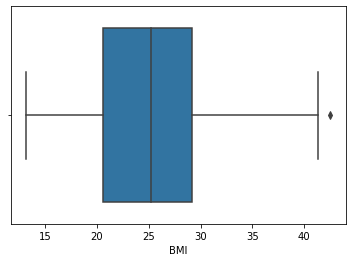

In [9]:
sns.boxplot(df.BMI)

In [10]:
#Handling outliers
perc_25 = df["BMI"].quantile(0.25)
perc_75 = df["BMI"].quantile(0.75)
IQR = perc_75 - perc_25

up_limit = perc_75 + 1.5*IQR
low_limit = perc_25 - 1.5*IQR

df["BMI"] = np.where(df["BMI"]>up_limit,up_limit,np.where(df["BMI"]<low_limit,low_limit,df["BMI"]))

In [11]:
df.describe()

,Age,Previous_Injury_History,Height_cm,Weight_kg,BMI,Hours_of_Training_per_week,Fitness_Level,Rest_between_matches_days,Bowling_Speed_kmph,Bat_Speed,Running_Speed_mps,Temperature_Celsius,Humidity_Percentage,Injury
count,300.000000,300.000000,300.000000,300.000000,299.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,28.300000,0.493333,174.076740,75.465337,25.466362,14.276667,10.072049,3.859276,121.376667,91.503333,5.983893,30.140203,65.559300,0.440000
std,6.313705,0.500791,14.911919,14.258236,6.465465,5.775058,2.888698,1.731800,19.600051,16.793951,1.177118,5.935249,14.538937,0.497216
min,18.000000,0.000000,150.131916,50.134066,13.127143,5.000000,5.010244,1.007692,90.000000,60.000000,4.002701,20.008207,40.013393,0.000000
25%,23.000000,0.000000,161.542713,63.643070,20.566868,9.000000,7.598061,2.311156,103.000000,77.000000,4.916638,25.241331,52.843528,0.000000
50%,28.000000,0.000000,173.445224,75.354354,25.212365,14.000000,10.107628,3.779446,121.000000,94.000000,6.008073,30.260224,64.136128,0.000000
75%,34.000000,1.000000,187.825775,88.633320,29.208798,19.000000,12.550921,5.413512,136.000000,105.000000,7.002484,35.205236,79.418207,1.000000
max,39.000000,1.000000,199.882442,99.756370,42.171692,24.000000,14.994536,6.836035,160.000000,120.000000,7.963577,39.985439,89.976182,1.000000


In [12]:
df = df.dropna(subset=['BMI'])

In [13]:
df.describe()

,Age,Previous_Injury_History,Height_cm,Weight_kg,BMI,Hours_of_Training_per_week,Fitness_Level,Rest_between_matches_days,Bowling_Speed_kmph,Bat_Speed,Running_Speed_mps,Temperature_Celsius,Humidity_Percentage,Injury
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,28.290970,0.494983,173.996080,75.468701,25.466362,14.267559,10.079331,3.867944,121.41806,91.438127,5.989862,30.128699,65.494254,0.438127
std,6.322349,0.500813,14.871220,14.282020,6.465465,5.782581,2.890782,1.728172,19.61977,16.784021,1.174534,5.941848,14.519520,0.496989
min,18.000000,0.000000,150.131916,50.134066,13.127143,5.000000,5.010244,1.007692,90.00000,60.000000,4.002701,20.008207,40.013393,0.000000
25%,23.000000,0.000000,161.490861,63.576424,20.566868,9.000000,7.593714,2.346023,103.00000,77.000000,4.922688,25.228811,52.807368,0.000000
50%,28.000000,0.000000,173.349789,75.356005,25.212365,14.000000,10.134074,3.787545,121.00000,94.000000,6.009501,30.256269,64.095583,0.000000
75%,34.000000,1.000000,187.778439,88.701334,29.208798,19.000000,12.553334,5.418587,136.00000,104.500000,7.003938,35.206429,79.366813,1.000000
max,39.000000,1.000000,199.882442,99.756370,42.171692,24.000000,14.994536,6.836035,160.00000,120.000000,7.963577,39.985439,89.976182,1.000000


In [14]:
df.columns

Index(['Player_ID', 'Age', 'Playing_Position', 'Previous_Injury_History',
       'Height_cm', 'Weight_kg', 'BMI', 'Hours_of_Training_per_week',
       'Fitness_Level', 'Type_of_Match', 'Playing_Conditions',
       'Rest_between_matches_days', 'Bowling_Speed_kmph', 'Bat_Speed',
       'Running_Speed_mps', 'Temperature_Celsius', 'Humidity_Percentage',
       'Ground_Conditions', 'Type_of_Training', 'Injury'],
      dtype='object')

In [15]:
df.drop(columns=['Player_ID'],inplace=True)

In [16]:
df.head()

,Age,Playing_Position,Previous_Injury_History,Height_cm,Weight_kg,BMI,Hours_of_Training_per_week,Fitness_Level,Type_of_Match,Playing_Conditions,Rest_between_matches_days,Bowling_Speed_kmph,Bat_Speed,Running_Speed_mps,Temperature_Celsius,Humidity_Percentage,Ground_Conditions,Type_of_Training,Injury
0,28,Wicketkeeper,1,163.992465,57.460405,21.365885,16,10.987692,Test,Sunny,6.314226,95,112,7.124635,34.780052,76.066972,Soft,Agility,0
1,34,Wicketkeeper,1,173.836443,72.690745,24.054563,5,5.108237,ODI,Rainy,5.963389,95,98,5.668334,25.422477,84.580732,Hard,Agility,0
2,26,Bowler,0,159.119262,64.192115,25.353398,19,10.795058,Test,Cloudy,6.382352,158,61,7.962443,20.090790,46.534832,Soft,Endurance,0
3,31,Bowler,0,166.128716,94.221452,34.139753,16,5.872317,ODI,Sunny,1.712422,150,75,4.216538,26.744893,51.772022,Wet,Strength,1
4,34,Wicketkeeper,1,154.518172,54.504335,22.828213,11,12.282132,T20,Cloudy,4.708979,98,118,4.173256,25.401703,41.999646,Hard,Agility,0


In [17]:
df.shape

(299, 19)

In [18]:
#df["Playing_Position"].values

In [19]:
mapping_pp = {"Bowler":1,"Batsman":2,"Wicketkeeper":3,"All-rounder":4}
mapping_tom = {"Test":1,"ODI":2,"T20":3}
mapping_poc = {"Sunny":1,"Rainy":2,"Cloudy":3}
mapping_gc = {"Soft":1,"Hard":2,"Wet":3}
mapping_tot = {"Agility":1,"Endurance":2,"Strength":3}

In [20]:
df["Playing_Position1"] = df["Playing_Position"].map(mapping_pp)
df["Type_of_Match1"] = df["Type_of_Match"].map(mapping_tom)
df["Playing_Conditions1"] = df["Playing_Conditions"].map(mapping_poc)
df["Ground_Conditions1"] = df["Ground_Conditions"].map(mapping_gc)
df["Type_of_Training1"] = df["Type_of_Training"].map(mapping_tot)

In [21]:
df.head()

,Age,Playing_Position,Previous_Injury_History,Height_cm,Weight_kg,BMI,Hours_of_Training_per_week,Fitness_Level,Type_of_Match,Playing_Conditions,...,Temperature_Celsius,Humidity_Percentage,Ground_Conditions,Type_of_Training,Injury,Playing_Position1,Type_of_Match1,Playing_Conditions1,Ground_Conditions1,Type_of_Training1
0,28,Wicketkeeper,1,163.992465,57.460405,21.365885,16,10.987692,Test,Sunny,...,34.780052,76.066972,Soft,Agility,0,3,1,1,1,1
1,34,Wicketkeeper,1,173.836443,72.690745,24.054563,5,5.108237,ODI,Rainy,...,25.422477,84.580732,Hard,Agility,0,3,2,2,2,1
2,26,Bowler,0,159.119262,64.192115,25.353398,19,10.795058,Test,Cloudy,...,20.090790,46.534832,Soft,Endurance,0,1,1,3,1,2
3,31,Bowler,0,166.128716,94.221452,34.139753,16,5.872317,ODI,Sunny,...,26.744893,51.772022,Wet,Strength,1,1,2,1,3,3
4,34,Wicketkeeper,1,154.518172,54.504335,22.828213,11,12.282132,T20,Cloudy,...,25.401703,41.999646,Hard,Agility,0,3,3,3,2,1


In [22]:
df["Playing_Position"] = df["Playing_Position1"]
df["Type_of_Match"] = df["Type_of_Match1"]
df["Playing_Conditions"] = df["Playing_Conditions1"]
df["Ground_Conditions"] = df["Ground_Conditions1"]
df["Type_of_Training"] = df["Type_of_Training1"]

In [23]:
df.head()

,Age,Playing_Position,Previous_Injury_History,Height_cm,Weight_kg,BMI,Hours_of_Training_per_week,Fitness_Level,Type_of_Match,Playing_Conditions,...,Temperature_Celsius,Humidity_Percentage,Ground_Conditions,Type_of_Training,Injury,Playing_Position1,Type_of_Match1,Playing_Conditions1,Ground_Conditions1,Type_of_Training1
0,28,3,1,163.992465,57.460405,21.365885,16,10.987692,1,1,...,34.780052,76.066972,1,1,0,3,1,1,1,1
1,34,3,1,173.836443,72.690745,24.054563,5,5.108237,2,2,...,25.422477,84.580732,2,1,0,3,2,2,2,1
2,26,1,0,159.119262,64.192115,25.353398,19,10.795058,1,3,...,20.090790,46.534832,1,2,0,1,1,3,1,2
3,31,1,0,166.128716,94.221452,34.139753,16,5.872317,2,1,...,26.744893,51.772022,3,3,1,1,2,1,3,3
4,34,3,1,154.518172,54.504335,22.828213,11,12.282132,3,3,...,25.401703,41.999646,2,1,0,3,3,3,2,1


In [24]:
df.columns

Index(['Age', 'Playing_Position', 'Previous_Injury_History', 'Height_cm',
       'Weight_kg', 'BMI', 'Hours_of_Training_per_week', 'Fitness_Level',
       'Type_of_Match', 'Playing_Conditions', 'Rest_between_matches_days',
       'Bowling_Speed_kmph', 'Bat_Speed', 'Running_Speed_mps',
       'Temperature_Celsius', 'Humidity_Percentage', 'Ground_Conditions',
       'Type_of_Training', 'Injury', 'Playing_Position1', 'Type_of_Match1',
       'Playing_Conditions1', 'Ground_Conditions1', 'Type_of_Training1'],
      dtype='object')

In [25]:
col_drop = ['Playing_Position1',
       'Type_of_Match1', 'Playing_Conditions1', 'Ground_Conditions1',
       'Type_of_Training1']

In [26]:
df.drop(columns=col_drop, inplace=True)

In [27]:
df.head(10)

,Age,Playing_Position,Previous_Injury_History,Height_cm,Weight_kg,BMI,Hours_of_Training_per_week,Fitness_Level,Type_of_Match,Playing_Conditions,Rest_between_matches_days,Bowling_Speed_kmph,Bat_Speed,Running_Speed_mps,Temperature_Celsius,Humidity_Percentage,Ground_Conditions,Type_of_Training,Injury
0,28,3,1,163.992465,57.460405,21.365885,16,10.987692,1,1,6.314226,95,112,7.124635,34.780052,76.066972,1,1,0
1,34,3,1,173.836443,72.690745,24.054563,5,5.108237,2,2,5.963389,95,98,5.668334,25.422477,84.580732,2,1,0
2,26,1,0,159.119262,64.192115,25.353398,19,10.795058,1,3,6.382352,158,61,7.962443,20.090790,46.534832,1,2,0
3,31,1,0,166.128716,94.221452,34.139753,16,5.872317,2,1,1.712422,150,75,4.216538,26.744893,51.772022,3,3,1
4,34,3,1,154.518172,54.504335,22.828213,11,12.282132,3,3,4.708979,98,118,4.173256,25.401703,41.999646,2,1,0
5,25,4,0,174.570271,76.884354,25.228847,8,9.513644,2,3,1.060610,122,93,6.502974,30.107226,69.067790,2,3,0
6,34,2,0,192.114417,90.357596,24.481879,17,9.922536,1,2,2.481787,108,91,6.741810,39.453177,61.367109,3,1,1
7,36,4,0,167.439332,66.996846,23.896780,10,11.843496,1,3,4.490835,140,85,7.884045,22.896555,77.940551,3,3,1
8,36,1,1,175.125882,82.984600,27.058071,7,5.799483,1,2,4.273485,148,62,5.713584,37.049387,83.642064,3,2,1
9,20,4,0,175.292895,68.133154,22.173276,23,6.646438,3,2,5.809389,128,91,6.115215,31.821518,77.909459,1,3,1


In [28]:
df.shape

(299, 19)

In [29]:
df.head()

,Age,Playing_Position,Previous_Injury_History,Height_cm,Weight_kg,BMI,Hours_of_Training_per_week,Fitness_Level,Type_of_Match,Playing_Conditions,Rest_between_matches_days,Bowling_Speed_kmph,Bat_Speed,Running_Speed_mps,Temperature_Celsius,Humidity_Percentage,Ground_Conditions,Type_of_Training,Injury
0,28,3,1,163.992465,57.460405,21.365885,16,10.987692,1,1,6.314226,95,112,7.124635,34.780052,76.066972,1,1,0
1,34,3,1,173.836443,72.690745,24.054563,5,5.108237,2,2,5.963389,95,98,5.668334,25.422477,84.580732,2,1,0
2,26,1,0,159.119262,64.192115,25.353398,19,10.795058,1,3,6.382352,158,61,7.962443,20.090790,46.534832,1,2,0
3,31,1,0,166.128716,94.221452,34.139753,16,5.872317,2,1,1.712422,150,75,4.216538,26.744893,51.772022,3,3,1
4,34,3,1,154.518172,54.504335,22.828213,11,12.282132,3,3,4.708979,98,118,4.173256,25.401703,41.999646,2,1,0


In [30]:
X=df.drop("Injury",axis=1)
y= df["Injury"]

In [31]:
X.head()

,Age,Playing_Position,Previous_Injury_History,Height_cm,Weight_kg,BMI,Hours_of_Training_per_week,Fitness_Level,Type_of_Match,Playing_Conditions,Rest_between_matches_days,Bowling_Speed_kmph,Bat_Speed,Running_Speed_mps,Temperature_Celsius,Humidity_Percentage,Ground_Conditions,Type_of_Training
0,28,3,1,163.992465,57.460405,21.365885,16,10.987692,1,1,6.314226,95,112,7.124635,34.780052,76.066972,1,1
1,34,3,1,173.836443,72.690745,24.054563,5,5.108237,2,2,5.963389,95,98,5.668334,25.422477,84.580732,2,1
2,26,1,0,159.119262,64.192115,25.353398,19,10.795058,1,3,6.382352,158,61,7.962443,20.090790,46.534832,1,2
3,31,1,0,166.128716,94.221452,34.139753,16,5.872317,2,1,1.712422,150,75,4.216538,26.744893,51.772022,3,3
4,34,3,1,154.518172,54.504335,22.828213,11,12.282132,3,3,4.708979,98,118,4.173256,25.401703,41.999646,2,1


In [32]:
y.value_counts()

0    168
1    131
Name: Injury, dtype: int64

In [33]:
y

0      0
1      0
2      0
3      1
4      0
      ..
294    1
295    0
296    1
297    0
298    0
Name: Injury, Length: 299, dtype: int64

In [34]:
sc=StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [75]:
X_pca = pca.fit_transform(X_scaled)

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.20,random_state=42)

In [77]:
X_train

array([[ 8.38331026e-02,  1.50835744e-01, -3.69453869e-01, ...,
         2.97458437e-01, -3.31021161e-01, -1.15295580e-01],
       [-5.21684959e-01, -2.34341954e+00, -1.77390226e-01, ...,
        -2.05180618e-01,  8.78968140e-01,  1.60419632e-01],
       [ 3.59393576e-01, -1.19115921e+00, -4.04785521e-01, ...,
        -1.20316938e+00, -3.09142062e-02,  8.84799937e-04],
       ...,
       [ 1.06903884e+00, -1.11128016e+00, -5.83807097e-01, ...,
         8.58551391e-02, -6.21872890e-01, -5.40084293e-02],
       [-1.83080366e+00, -6.40276210e-01, -1.53802024e+00, ...,
         4.69570209e-01,  2.85333818e-01,  1.20101843e-01],
       [-1.77956757e+00,  5.91836383e-01, -2.39502985e+00, ...,
         8.28700788e-01, -4.96809758e-01, -1.03541012e-01]])

In [78]:
#y_train

In [79]:
#y_test

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [81]:
y_pred1 = lr.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy of Log. Classifier: {accuracy*100:.2f}%")

Accuracy of Log. Classifier: 78.33%


In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7833333333333333

In [84]:
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear', 'saga']  # Solver (depends on the penalty)
}


grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_logistic_regression = LogisticRegression(**best_params)

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [85]:

best_logistic_regression.fit(X_train, y_train)


pred2 = best_logistic_regression.predict(X_test)


accuracy = accuracy_score(y_test, pred2)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 78.33%


In [86]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')


print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation accuracy scores: [0.66666667 0.77083333 0.79166667 0.75       0.80851064]
Mean accuracy: 0.7575354609929078


## Voting Concept

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

In [87]:
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators=[("knn",knn),("dt",dt),("rf",rf)],voting="hard")

In [88]:
voting_classifier.fit(X_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42))])

In [89]:
prediction_voting = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, prediction_voting)
print(f"Accuracy of Bagging Classifier: {accuracy}")

Accuracy of Bagging Classifier: 0.7


## Bagging Concept

In [90]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [91]:
base_estimator = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)

In [92]:
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  random_state=42)

In [93]:
y_pred = bagging_classifier.predict(X_test)

In [94]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bagging Classifier: {accuracy}")

Accuracy of Bagging Classifier: 0.6


In [95]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(bagging_classifier, X_train, y_train, cv=5, scoring='accuracy')


print("Cross-validation accuracy scores:", scores1)
print("Mean accuracy:", scores1.mean())

Cross-validation accuracy scores: [0.625      0.64583333 0.64583333 0.70833333 0.82978723]
Mean accuracy: 0.6909574468085108


In [96]:
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of base estimators in the ensemble
    'max_samples': [0.5, 0.7, 1.0],  # Proportion of samples to draw for each base estimator
    'max_features': [0.5, 0.7, 1.0]  # Proportion of features to consider for each base estimator
}


grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}


In [97]:
best_bagging_classifier = BaggingClassifier(base_estimator=base_estimator,**best_params,  random_state=42)


best_bagging_classifier.fit(X_train, y_train)


predictions1 = best_bagging_classifier.predict(X_test)


accuracy = accuracy_score(y_test, predictions1)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 60.00%


In [98]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,predictions1)


0.6

In [99]:
print(classification_report(predictions1,y_test))

              precision    recall  f1-score   support

           0       0.79      0.61      0.69        44
           1       0.35      0.56      0.43        16

    accuracy                           0.60        60
   macro avg       0.57      0.59      0.56        60
weighted avg       0.67      0.60      0.62        60



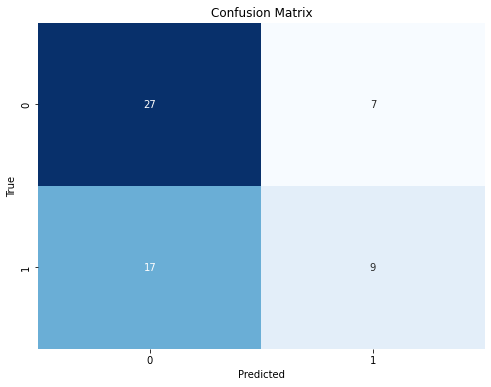

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [101]:
#import pickle

In [102]:
#pickle.dump(best_bagging_classifier,open("best_bagging_classifier.pkl",'wb'))

## Boosting Concept

In [103]:
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)


adaboost_classifier.fit(X_train, y_train)


y_pred = adaboost_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost Classifier: {accuracy}")

Accuracy of AdaBoost Classifier: 0.7


In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


random_forest_classifier.fit(X_train, y_train)


y_pred = random_forest_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy}")

Accuracy of Random Forest Classifier: 0.6666666666666666


In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)


gradient_boosting_classifier.fit(X_train, y_train)


y_pred = gradient_boosting_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gradient Boosting Classifier: {accuracy}")

Accuracy of Gradient Boosting Classifier: 0.6666666666666666


In [66]:
#!pip install xgboost

In [106]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)


xgb_classifier.fit(X_train, y_train)


y_pred_xgb = xgb_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost Classifier: {accuracy}")

Accuracy of XGBoost Classifier: 0.65


In [107]:
score_xgb = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='accuracy')


print("Cross-validation accuracy scores:", score_xgb)
print("Mean accuracy:", score_xgb.mean())

Cross-validation accuracy scores: [0.52083333 0.64583333 0.8125     0.77083333 0.87234043]
Mean accuracy: 0.7244680851063829


In [69]:
xgb_model = XGBClassifier()

# Define hyperparameters grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05]
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Best Score (Accuracy): 0.824290780141844


In [70]:

xgb_classifier = XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth = 3, random_state=42)


xgb_classifier.fit(X_train, y_train)


y_pred3 = xgb_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy of XGBoost Classifier: {accuracy}")

Accuracy of XGBoost Classifier: 0.8


In [71]:
print(classification_report(y_pred_xgb,y_test))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        37
           1       0.73      0.83      0.78        23

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60



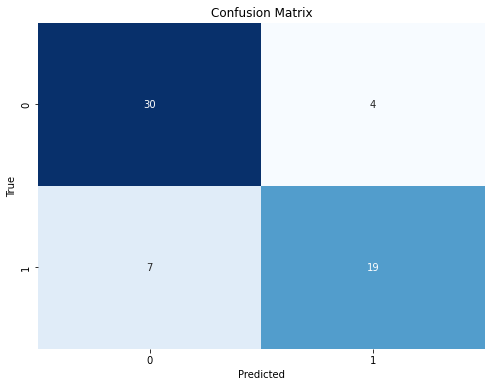

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

import pickle
pickle.dump(best_bagging_classifier,open("XGB_Classifier.pkl",'wb'))